## INTRO

Baseado em: https://pythonfordatascience.org/anova-python/

<b>Definição: </b>

A ANOVA é um teste paramétrico (possui estimativas de parâmetros) utilizado quando o pesquisador deseja verificar se existem diferenças entre as médias de uma determinada variável (variável resposta) em relação a um tratamento com dois ou mais níveis categóricos (variável preditora). O teste t também é utilizado nesse tipo de procedimento (com no máximo de dois níveis), porém a ANOVA é indicada para análises com um “n” amostral superior a 30.

<b>Premissas:</b>

Amostras independentes – isso significa que uma observação não pode ser influenciada pela anterior ou pela próxima. Esse pressuposto garante que os dados sejam coletados aleatoriamente dentro do espaço amostral.

Homogeneidade das variâncias entre os grupos – as variância dentro de cada grupo é igual (ou pelo menos aproximadamente) àquela dentro de todos os grupos. Desta forma, cada tratamento contribui de forma igual para a soma dos quadrados.

Resíduos seguem uma distribuição normal – assume-se que a média geral dos resíduos é igual a zero, ou seja, distribuem-se normalmente. Esse pressuposto não é muito restritivo dependendo do tamanho amostral.

## PRÉ-PROCESSAMENTO

In [1]:
# Importa as bibliotecas
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

In [2]:
# carrega os dados
df = pd.read_csv('ANOVA-DATASET.csv', sep=',')
df.head()

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4


In [3]:
# Exclui coluna id (não será usada)
df.drop('person', axis= 1, inplace= True)

# Altera o campo dose, deixando como uma string mais explicativa
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)
    
# Obtém estatística descritiva de LIBIDO
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.466667,1.76743,0.456349,2.487896,4.445437


Sobre as descritivas:
- Variable: A variável é libido;
- N: Quantidade de elementos. No caso, temos 15 indivíduos;
- Mean: A média da variável libido é 3.46. Note, no entanto, que libido é uma variável categórica e não contínua. Ela está sendo tratada como contínua, mas essa é uma análise equivocada. Ainda que a gente possa dizer que 4 é maior que 3, ali o que temos seria o equivalente a classificar como Baixa, Média, Alta e Muito Alta, ou algo do tipo. São os níveis da libido;
- SD: Desvio padrão da libido é de 1.76;
- SE: Erro Padrão = SD/raiz(n) da libido é 0.45;
- O intervalo de confiança 95% vai de 2.487896 a 4.445437. Isso significa que se escolhermos da população 100 pessoas de forma aleatória, 95 estarão nesse intervalo.

In [5]:
# Estatística Descritiva da Libido separada por dose
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.581139,0.707107,3.450484,6.549516
low,5,3.2,1.303840,0.583095,1.922236,4.477764
placebo,5,2.2,1.303840,0.583095,0.922236,3.477764


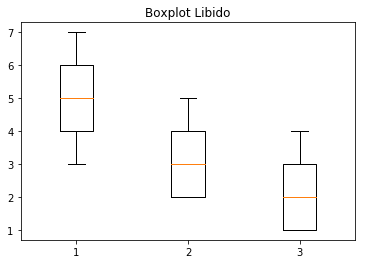

In [6]:
# Boxplot (Gráfico para mostrar distribuição)
fig1, ax1 = plt.subplots()

df_new = [df[df['dose']=='high']['libido'], df[df['dose']=='low']['libido'], df[df['dose']=='placebo']['libido']]

ax1.set_title('Boxplot Libido')

ax1.boxplot(df_new)

plt.show()

Sobre o Boxplot:
    - O gráfico serve para nos mostrar a distribuição da variável;
    - O traço no meio da caixa representa a mediana;
    - Dentro da caixa, temos 50% da amostra. O limite inferior é o p25 e o superior o p75. Ou seja, para a dose 1, temos que 25% da amostra apresentou libido até no máximo 4. 50% da amostra teve libido até 5. E por aí vai. O máximo foi 7 e o mínimo 3. Dentro da caixa estaria o "grosso" da amostra.
    
Visualmente, parece que se trata de 3 grupos diferentes. Será que podemos verificar isso estatisticamente com algum grau de confiança?

## RODANDO ANOVA

In [7]:
# Como é a sintaxe: stats.f_oneway(data_group1, data_group2, data_group3, data_groupN)

stats.f_oneway(df['libido'][df['dose'] == 'high'], 
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

Olhando para o p-valor, temos que houve efeito da medicação na libido. <br>
Porém, não sabemos onde está a diferença. <br>
<b>Atenção: </b> Para uma eventual publicação/pesquisa acadêmica, a análise carece de informações.

In [8]:
# Obtem mais informacoes
results = ols('libido ~ C(dose)', data=df).fit()
results.summary()

/Users/andremota/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Sat, 14 Mar 2020   Prob (F-statistic):             0.0247
Time:                        15:23:39   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0.627      7.972      0.000       3.634       6.366
C(dose)[T.low]        -1.8000      0.887     -2.029      0.065      -3.732       0.132
C(dose)[T.placebo]    -2.8000      0.887     -3.157      0.008      -4.732      -0.868
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Reparou que rodamos uma REGRESSÃO LINEAR para fazer uma ANOVA?<br>
Dica de leitura: https://stats.stackexchange.com/questions/175246/why-is-anova-equivalent-to-linear-regression

<b>Sobre o Modelo: </b><br>
O modelo é significante como um todo, F(2,12)= 5.12, p = 0.0247

Os coeficientes são a diferença entre o grupo controle e o respectivo grupo listado. O intercepto é a média para o grupo de alta dosagem (high dose). O coeficiente do grupo placebo é 2.2-5.0=-2.8, para a baixa dosagem (low dose) é 3.2-5.0=-1.8. Olhando pelos p-valores agora (P>|t| na tabela), nós podemos observar que a diferença entre o grupo de alta dose e o placebo é significante, p=0.008, mas a diferença entre o grupo de baixa e alta dosagem não é, p=0.065. Claro, considerando 95%. Não há comparação entre o grupo de baixa dosagem e o placebo.<br>

Olhando para a tabela, especificamente para o P-Valor e o F-Estatística, nós conseguimos saber se nós explicamos uma quantidade significativa da variação.<br> 

Ok, mas e quanto a comparação dos grupos entre si? Para isso, precisamos fazer algumas análises adicionais. Nós precisamos da tabela ANOVA.

<b>R-quadrado</b> é chamado de eta-quadrado na ANOVA. Nosso modelo responde por 46% da variação da libido.

<b>Estatística-F </b> serve para avaliar se os valores esperados de uma variável entre diferentes grupos se difere. Em outras palavras, em um ensaio clínico, por exemplo, a estatística-F serve . For example, suppose that a medical trial compares four treatments. The ANOVA F-test can be used to assess whether any of the treatments is on average superior, or inferior, to the others versus the null hypothesis that all four treatments yield the same mean response. This is an example of an "omnibus" test, meaning that a single test is performed to detect any of several possible differences. Alternatively, we could carry out pairwise tests among the treatments (for instance, in the medical trial example with four treatments we could carry out six tests among pairs of treatments). The advantage of the ANOVA F-test is that we do not need to pre-specify which treatments are to be compared, and we do not need to adjust for making multiple comparisons. The disadvantage of the ANOVA F-test is that if we reject the null hypothesis, we do not know which treatments can be said to be significantly different from the others, nor, if the F-test is performed at level α, can we state that the treatment pair with the greatest mean difference is significantly different at level α.

F = Variabilidade entre os grupos / Variabilidade intra-grupo <br>
<br>
Variabilidade entre grupos:<br>
<img src="variacao-entre-grupos.png">
<br>
Variabilidade intra-grupo:<br>
<img src="variacao-intra-grupo.png">

In [9]:
# Obtendo a tabela ANOVA
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


In [29]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(dose),20.133333,2.0,10.066667,5.118644,0.024694,0.460366,0.354486
Residual,23.600000,12.0,1.966667,NaN,NaN,NaN,NaN


## Assumption Checks/Model Diagnostics

In [30]:
results.diagn

{'jb': 1.1080275776425257,
 'jbpv': 0.574638696944554,
 'skew': 0.19458085550134038,
 'kurtosis': 1.726659006032749,
 'omni': 2.517358660775963,
 'omnipv': 0.2840288872319991,
 'condno': 3.7320508075688767,
 'mineigval': 1.3397459621556138}

These are the same diagnostics from the bottom of the regression table from before. The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

In [31]:
# Homogeneity of variance
stats.levene(df['libido'][df['dose'] == 'placebo'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'high'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

In [32]:
# Normality
stats.shapiro(results.resid)

(0.916691780090332, 0.1714704930782318)

In [33]:
# TUKEY’S HSD POST-HOC COMPARISON
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['libido'], df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower   upper  reject
----------------------------------------------
 high    low     -1.8   -4.1651  0.5651 False 
 high  placebo   -2.8   -5.1651 -0.4349  True 
 low   placebo   -1.0   -3.3651  1.3651 False 
----------------------------------------------


In [34]:
# BONFERRONI CORRECTION POST-HOC COMPARISON
stats.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'low'])

Ttest_indResult(statistic=1.963961012123931, pvalue=0.08513507177899203)

In [35]:
stats.ttest_ind(df['libido'][df['dose'] == 'low'], df['libido'][df['dose'] == 'placebo'])

Ttest_indResult(statistic=1.2126781251816647, pvalue=0.2598450452137845)

In [36]:
stats.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'placebo'])

Ttest_indResult(statistic=3.0550504633038926, pvalue=0.015700141250047695)

Using the Bonferroni correction, only the difference between the high dose and placebo groups are significantly different. We can calculate the high dosing’s effect size! To calculate the effect size for the treatment dosing we also need to calculate the degrees of freedom since it’s not provided. The following equations can be used:<br>

dof = #_observations_group1 + #_observations_group2 - #_of_groups <br>
dof = 5 + 5 - 2 = 8 <br>
effect size r = square root of (t2/t2 + dof) <br>
effect size r = sqrt(1.213**2/(1.213**2 + 8)) = 0.39 <br>

## ANOVA Results Interpretation

While interpreting the ANOVA results, the Bonferroni post-hoc analysis results will be used.

There was a significant effect of Difficile on the level of libido, F(2,12)= 5.12, p < 0.05, ?2 = 0.35. Planned post-hoc testing, using the Bonferroni correction ?= 0.0167, revealed that high dose of Difficile significantly increased libido compared to the placebo, t(8)=3.06, p < 0.0167, r= 0.39. There were no other statistically significant differences between groups.

